# Курсовой проект на тему "Предсказание цены на квартиры"
***

##  1. Анализ и подготовка данных

Импортируем библиотеки

In [85]:
import pandas as pd

Читаем файл с тренировочными данными train.csv

In [86]:
d = pd.read_csv('train.csv')

Смотрим описание

In [87]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


Так как размеры разные (10000, 7887, 5202), то в данных есть пропуски (неопределенные значения)

Смотрим несколько первых строк

In [88]:
d.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


Посмотрим, что там не так со столбцом LifeSquare

In [89]:
ls = d['LifeSquare']

In [90]:
lsd = pd.Series(ls)

In [91]:
lsd.describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

Заменим NaN-значения LifeSquare значениями из столбца Square. Для этого заведем новый датафрейм d_cleared.

In [92]:
d_cleared = d.copy()

In [93]:
d_cleared.loc[ls.isna(), 'LifeSquare'] = d.loc[ls.isna(), 'Square']

In [94]:
d_cleared.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,80.312926,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,64.511437,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [95]:
d_cleared['LifeSquare'].describe()

count    10000.000000
mean        42.091874
std         77.880874
min          0.370619
25%         25.506959
50%         37.562685
75%         50.098049
max       7480.592129
Name: LifeSquare, dtype: float64

Посмотрим на корреляцию LifeSquare и Square, тех, что до замены NaN-ов.

In [96]:
d_tmp = pd.DataFrame({'LS':pd.Series(d['LifeSquare']), 'TS':pd.Series(d['Square'])})

In [97]:
d_tmp.head(10)

,LS,TS
0,29.442751,47.981561
1,40.049543,65.683640
2,29.197612,44.947953
3,52.731512,53.352981
4,23.776169,39.649192
5,46.683720,80.384479
6,37.160377,62.254114
7,NaN,80.312926
8,NaN,64.511437
9,18.915552,46.461409


In [98]:
d_tmp.corr()

,LS,TS
LS,1.000000,0.196129
TS,0.196129,1.000000


In [99]:
import matplotlib.pyplot as plt

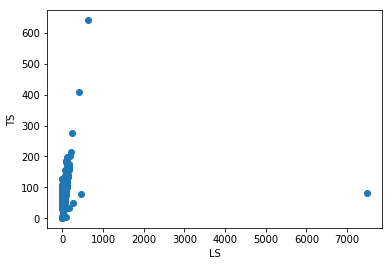

In [100]:
plt.scatter(d_tmp.loc[:,'LS'], d_tmp.loc[:,'TS'])
plt.xlabel('LS')
plt.ylabel('TS')
plt.show()

Удалим выбросы и логически противоречивые данные, и пересчитаем коэффициент корреляции.

In [101]:
d_tmp_cleared = d_tmp.copy()

In [102]:
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['LS'] > 7000].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['TS'] > 7000].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['LS'] > 600].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['TS'] > 600].index, inplace=True)
d_tmp_cleared.drop(d_tmp_cleared[d_tmp_cleared['LS'] > d_tmp_cleared['TS']].index, inplace=True)

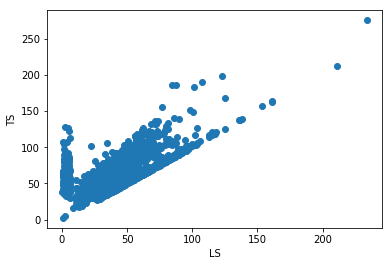

In [103]:
plt.scatter(d_tmp_cleared.loc[:,'LS'], d_tmp_cleared.loc[:,'TS'])
plt.xlabel('LS')
plt.ylabel('TS')
plt.show()

In [104]:
r_TL = d_tmp_cleared.corr()
r_corr = r_TL['LS']['TS']
r_corr

0.7826915415512269

In [105]:
d_tmp_cleared.corr(method='spearman')

,LS,TS
LS,1.000000,0.813652
TS,0.813652,1.000000


Коэффициент корреляции - 0.8. Вывод: LifeSquare и Square довольно-таки коррелированы. Значит, заменяем NaN в LifeSquare соответствующими значениями Square.

In [106]:
d_tmp_cleared.describe()

,LS,TS
count,7404.000000,9516.000000
mean,34.490831,56.074374
std,16.107193,18.841455
min,0.370619,2.377248
25%,22.544752,41.816743
50%,32.020108,52.450782
75%,43.777890,65.832811
max,233.949309,275.645284


In [107]:
d_cleared = d_tmp_cleared.copy()
d_cleared.loc[d_cleared['LS'].isna(), 'LS'] = r_corr * d_cleared.loc[d_cleared['LS'].isna(), 'TS']

In [108]:
d_cleared.head(10)

,LS,TS
0,29.442751,47.981561
1,40.049543,65.683640
2,29.197612,44.947953
3,52.731512,53.352981
4,23.776169,39.649192
5,46.683720,80.384479
6,37.160377,62.254114
7,62.860248,80.312926
8,50.492556,64.511437
9,18.915552,46.461409


Чистка изначального фрейма

In [109]:
d_cleared = d.copy()

In [110]:
d_cleared.drop(d_cleared[d_cleared['LifeSquare'] > 7000].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['Square'] > 7000].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['LifeSquare'] > 600].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['Square'] > 600].index, inplace=True)
d_cleared.drop(d_cleared[d_cleared['LifeSquare'] > d_cleared['Square']].index, inplace=True)

Линейное предсказание LifeSquare по Square (через коэфф. корреляции; в среднем, должно быть лучше, чем простое копирование)

In [111]:
d_cleared.loc[d_cleared['LifeSquare'].isna(), 'LifeSquare'] = r_corr * d_cleared.loc[d_cleared['LifeSquare'].isna(), 'Square']

In [112]:
d_cleared.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,62.860248,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,50.492556,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [113]:
d_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 9999
Data columns (total 20 columns):
Id               9516 non-null int64
DistrictId       9516 non-null int64
Rooms            9516 non-null float64
Square           9516 non-null float64
LifeSquare       9516 non-null float64
KitchenSquare    9516 non-null float64
Floor            9516 non-null int64
HouseFloor       9516 non-null float64
HouseYear        9516 non-null int64
Ecology_1        9516 non-null float64
Ecology_2        9516 non-null object
Ecology_3        9516 non-null object
Social_1         9516 non-null int64
Social_2         9516 non-null int64
Social_3         9516 non-null int64
Healthcare_1     5031 non-null float64
Helthcare_2      9516 non-null int64
Shops_1          9516 non-null int64
Shops_2          9516 non-null object
Price            9516 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


Разберемся с комнатами

In [114]:
rooms = d_cleared['Rooms']

In [115]:
rooms.describe()

count    9516.000000
mean        1.896385
std         0.840629
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        19.000000
Name: Rooms, dtype: float64

In [116]:
d_RP = pd.DataFrame({'ROOMS':pd.Series(d_cleared['Rooms']), 'PRICE':pd.Series(d_cleared['Price'])})

In [117]:
d_RP.corr()

,PRICE,ROOMS
PRICE,1.000000,0.556186
ROOMS,0.556186,1.000000


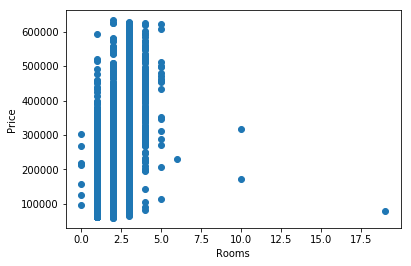

In [118]:
plt.scatter(d_RP.loc[:,'ROOMS'], d_RP.loc[:,'PRICE'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

Параметр Rooms по определению целочисленный, четкой корреляции между Rooms и Price не прослеживается. Оно и понятно - на цену влияет множество других факторов.

In [119]:
rooms.value_counts()

2.0     3716
1.0     3487
3.0     2140
4.0      143
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Удалим маловероятное количество комнат: 0, 5, 6, 10, 19

In [120]:
d_cleared.drop(d_cleared[d_cleared['Rooms'] > 4].index, inplace=True)

In [121]:
d_cleared.drop(d_cleared[d_cleared['Rooms'] == 0].index, inplace=True)

In [122]:
d_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9486 entries, 0 to 9999
Data columns (total 20 columns):
Id               9486 non-null int64
DistrictId       9486 non-null int64
Rooms            9486 non-null float64
Square           9486 non-null float64
LifeSquare       9486 non-null float64
KitchenSquare    9486 non-null float64
Floor            9486 non-null int64
HouseFloor       9486 non-null float64
HouseYear        9486 non-null int64
Ecology_1        9486 non-null float64
Ecology_2        9486 non-null object
Ecology_3        9486 non-null object
Social_1         9486 non-null int64
Social_2         9486 non-null int64
Social_3         9486 non-null int64
Healthcare_1     5017 non-null float64
Helthcare_2      9486 non-null int64
Shops_1          9486 non-null int64
Shops_2          9486 non-null object
Price            9486 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [123]:
rooms = d_cleared['Rooms']

In [124]:
d_RP = pd.DataFrame({'ROOMS':pd.Series(d_cleared['Rooms']), 'PRICE':pd.Series(d_cleared['Price'])})

In [125]:
d_RP.corr()

,PRICE,ROOMS
PRICE,1.000000,0.575314
ROOMS,0.575314,1.000000


In [126]:
d_RP.corr(method='spearman')

,PRICE,ROOMS
PRICE,1.000000,0.601828
ROOMS,0.601828,1.000000


Коэффициент корреляции, все-таки, небольшой (менее 0,8).

Разберемся с этажами и этажностью

In [127]:
floors = d_cleared['Floor']

In [128]:
floors.describe()

count    9486.000000
mean        8.459836
std         5.172004
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        42.000000
Name: Floor, dtype: float64

In [129]:
floors.value_counts()

4     905
5     835
3     815
6     780
7     727
8     615
9     580
2     566
10    527
11    439
12    405
13    376
14    345
15    276
16    272
17    229
1     224
18    178
19    111
20     61
21     49
22     49
24     42
25     28
23     25
26     15
27      5
32      2
42      1
33      1
28      1
37      1
31      1
Name: Floor, dtype: int64

In [130]:
house_floors = rooms = d_cleared['HouseFloor']

In [131]:
house_floors.describe()

count    9486.000000
mean       12.565570
std         6.562724
min         0.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        99.000000
Name: HouseFloor, dtype: float64

In [132]:
house_floors.value_counts()

17.0    2173
9.0     1358
12.0    1045
5.0     1018
14.0     619
16.0     565
1.0      437
25.0     336
22.0     322
0.0      248
24.0     162
8.0      140
4.0      125
10.0     124
15.0     117
3.0      107
20.0      96
19.0      93
18.0      82
7.0       53
6.0       52
2.0       39
23.0      37
21.0      29
11.0      27
13.0      26
30.0      20
40.0       7
27.0       6
32.0       4
37.0       3
28.0       3
48.0       2
39.0       2
29.0       1
31.0       1
99.0       1
38.0       1
44.0       1
36.0       1
26.0       1
45.0       1
47.0       1
Name: HouseFloor, dtype: int64

In [133]:
d_FHF = pd.DataFrame({'Floors':pd.Series(d_cleared['Floor']), 'HouseFloor':pd.Series(d_cleared['HouseFloor'])})

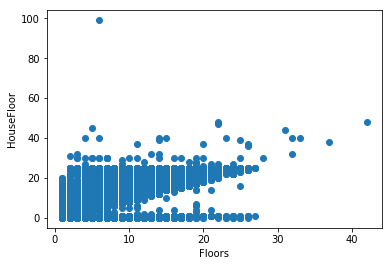

In [134]:
plt.scatter(d_FHF.loc[:,'Floors'], d_FHF.loc[:,'HouseFloor'])
plt.xlabel('Floors')
plt.ylabel('HouseFloor')
plt.show()

Так как этаж не должен превышать этажность дома, удалим противоречивые данные

In [135]:
d_cleared.drop(d_cleared[d_cleared['Floor'] > d_cleared['HouseFloor']].index, inplace=True)

In [136]:
d_FHF = pd.DataFrame({'Floors':pd.Series(d_cleared['Floor']), 'HouseFloor':pd.Series(d_cleared['HouseFloor'])})

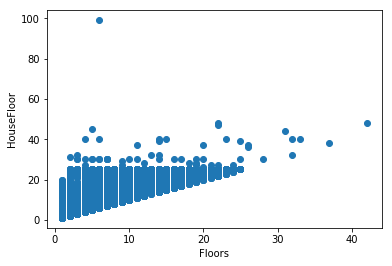

In [137]:
plt.scatter(d_FHF.loc[:,'Floors'], d_FHF.loc[:,'HouseFloor'])
plt.xlabel('Floors')
plt.ylabel('HouseFloor')
plt.show()

In [138]:
house_floors = d_cleared['HouseFloor']
house_floors.describe()

count    7800.000000
mean       13.918974
std         5.790757
min         1.000000
25%         9.000000
50%        14.000000
75%        17.000000
max        99.000000
Name: HouseFloor, dtype: float64

In [139]:
house_floors.value_counts()

17.0    2035
9.0     1179
12.0     941
5.0      780
14.0     573
16.0     513
25.0     328
22.0     311
24.0     150
10.0     116
8.0      111
15.0     106
20.0      91
19.0      88
4.0       86
18.0      74
3.0       54
7.0       44
6.0       38
23.0      33
21.0      27
13.0      22
30.0      20
11.0      19
2.0       14
1.0       11
40.0       7
27.0       6
32.0       4
28.0       3
37.0       3
48.0       2
39.0       2
99.0       1
38.0       1
29.0       1
36.0       1
45.0       1
26.0       1
44.0       1
31.0       1
47.0       1
Name: HouseFloor, dtype: int64

In [140]:
d_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7800 entries, 0 to 9999
Data columns (total 20 columns):
Id               7800 non-null int64
DistrictId       7800 non-null int64
Rooms            7800 non-null float64
Square           7800 non-null float64
LifeSquare       7800 non-null float64
KitchenSquare    7800 non-null float64
Floor            7800 non-null int64
HouseFloor       7800 non-null float64
HouseYear        7800 non-null int64
Ecology_1        7800 non-null float64
Ecology_2        7800 non-null object
Ecology_3        7800 non-null object
Social_1         7800 non-null int64
Social_2         7800 non-null int64
Social_3         7800 non-null int64
Healthcare_1     4208 non-null float64
Helthcare_2      7800 non-null int64
Shops_1          7800 non-null int64
Shops_2          7800 non-null object
Price            7800 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.2+ MB


In [141]:
floors = d_cleared['Floor']

In [142]:
price = d_cleared['Price']

In [143]:
d_PF = pd.DataFrame({'Floor':pd.Series(floors), 'Price':pd.Series(price)})

In [144]:
d_PF.corr()

,Floor,Price
Floor,1.000000,0.106916
Price,0.106916,1.000000


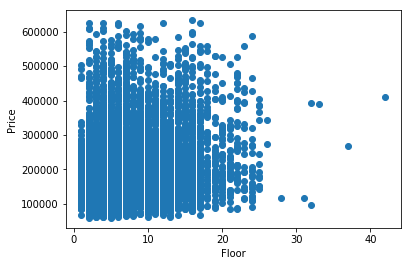

In [145]:
plt.scatter(floors, price)
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()

In [146]:
d_PHF = pd.DataFrame({'HouseFloor':pd.Series(house_floors), 'Price':pd.Series(price)})

In [147]:
d_PHF.corr()

,HouseFloor,Price
HouseFloor,1.000000,0.092129
Price,0.092129,1.000000


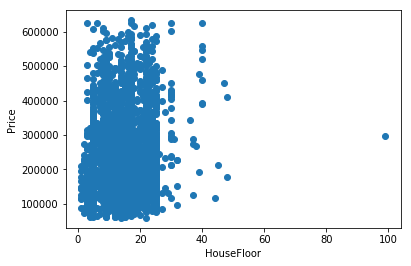

In [148]:
plt.scatter(house_floors, price)
plt.xlabel('HouseFloor')
plt.ylabel('Price')
plt.show()

Корреляции никакой...

Выясним года

In [150]:
years = d_cleared['HouseYear']

In [151]:
years.describe()

count    7.800000e+03
mean     4.555462e+03
std      2.270218e+05
min      1.910000e+03
25%      1.973000e+03
50%      1.977000e+03
75%      2.000000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [152]:
years.value_counts()

1977        1753
2015         195
2017         185
2016         182
1970         170
1969         163
1972         151
1974         145
1971         145
2014         142
1968         138
1973         137
1965         132
1976         132
1975         131
1963         124
1967         121
1964         115
1978         111
1966         110
2018         106
1982         104
1962          98
1960          97
1979          95
1980          94
2005          93
1981          93
2009          90
1961          89
            ... 
1954          11
1952           9
1953           8
1950           7
1935           5
1918           4
1951           4
1931           4
1933           3
1934           3
1939           3
1937           3
1938           3
1942           2
1936           2
1940           2
1948           2
1941           2
1929           2
1917           2
1930           2
1919           2
1912           2
1932           2
1928           1
1916           1
1910           1
1947          

Удалим маловероятные и невозможные года

In [153]:
d_cleared.drop(d_cleared[d_cleared['HouseYear'] > 2019].index, inplace=True)

In [154]:
d_cleared.drop(d_cleared[d_cleared['HouseYear'] < 1950].index, inplace=True)

In [155]:
years = d_cleared['HouseYear']
price = d_cleared['Price']

In [156]:
d_YP = pd.DataFrame({'Years':pd.Series(years), 'Price':pd.Series(price)})

In [157]:
d_YP.corr()

,Price,Years
Price,1.000000,0.067894
Years,0.067894,1.000000


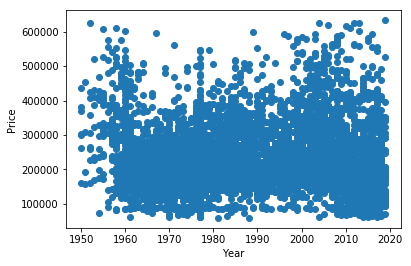

In [158]:
plt.scatter(years, price)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [161]:
d_cleared.shape

(7731, 20)

Разберемся с районами

In [162]:
districts = d_cleared['DistrictId']

In [163]:
d_DP = pd.DataFrame({'District':pd.Series(districts), 'Price':pd.Series(price)})

In [164]:
d_DP.corr()

,District,Price
District,1.000000,0.261979
Price,0.261979,1.000000


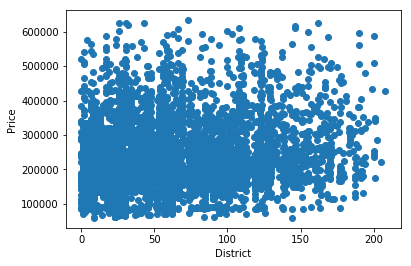

In [165]:
plt.scatter(districts, price)
plt.xlabel('District')
plt.ylabel('Price')
plt.show()

Удалим лишние столбцы (шелуху)

In [168]:
d_cleared.drop(columns=['KitchenSquare', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2'])

,Id,DistrictId,Rooms,Square,LifeSquare,Floor,HouseFloor,HouseYear,Price
0,14038,35,2.0,47.981561,29.442751,7,9.0,1969,184966.930730
1,15053,41,3.0,65.683640,40.049543,7,9.0,1978,300009.450063
2,4765,53,2.0,44.947953,29.197612,8,12.0,1968,220925.908524
3,5809,58,2.0,53.352981,52.731512,8,17.0,1977,175616.227217
4,10783,99,1.0,39.649192,23.776169,11,12.0,1976,150226.531644
5,12915,59,3.0,80.384479,46.683720,5,17.0,2011,215898.447742
6,14549,154,2.0,62.254114,37.160377,3,5.0,1960,296021.204377
8,5172,1,2.0,64.511437,50.492556,9,17.0,1977,229102.795999
9,8649,23,1.0,46.461409,18.915552,13,17.0,2014,95380.220993
10,15370,28,2.0,46.304907,27.922584,8,9.0,1973,204243.553129


## 2. Построение модели